In [1]:
import numpy as np

# Define Euler Approx.
def Euler(df,y_0,x_0,x_N,N):
    """
    df = a derivative function of x and y (dx/dy)
    y_0 = initial y value
    x_0 = initial x value
    x_N = final x value
    N = number of steps between x_0 and x_N
    """
    h = (x_N-x_0)/(N-1) # step size
    X = np.arange(x_0,x_N,h) # array of x values
    
    # Initialise y array with first value.
    Y = [y_0]
    
    # Iterate y(x) over x.
    for i in range(int(N-1)):
        Y.append(Y[i]+df(X[i],Y[i])*h)

    return Y

# Define Runge-Kutta Approx (Second Order).
def RuKu2(df,y_0,x_0,x_N,N):
    """
    df = a derivative function of x and y (dx/dy)
    y_0 = initial y value
    x_0 = initial x value
    x_N = final x value
    N = number of steps between x_0 and x_N
    """
    h = (x_N-x_0)/(N-1) # step size
    X = np.linspace(x_0,x_N,N) # array of x values
    
    # Initialise y array with first value.
    Y = [y_0]
    
    # Iterate y(x) over x.
    for i in range(int(N-1)):
        k1 = df(X[i],Y[i])
        k2 = df(X[i]+h,Y[i]+k1*h)
        Y.append(Y[i]+(0.5*k1+0.5*k2)*h)
        
    return Y

# Define Runge-Kutta Approx (Fouth Order).
def RuKu4(df,y_0,x_0,x_N,N):
    """
    df = a derivative function of x and y (dx/dy)
    y_0 = initial y value
    x_0 = initial x value
    x_N = final x value
    N = number of steps between x_0 and x_N
    """
    h = (x_N-x_0)/(N-1) # step size
    X = np.linspace(x_0,x_N,N) # array of x values
    
    # Initialise y array with first value.
    Y = [y_0]
    
    # Iterate y(x) over x.
    for i in range(int(N-1)):
        k1 = h*df(X[i],
                  Y[i])
        k2 = h*df(X[i]+h/2,
                  Y[i]+k1/2)
        k3 = h*df(X[i]+h/2,
                  Y[i]+k2/2)
        k4 = h*df(X[i]+h,
                  Y[i]+k3)
        Y.append(Y[i]+k1/6+k2/3+k3/3+k4/6)

    return Y

In [2]:
# create time array.
t0 = 0.
tN = 10.
N = 51
T = np.linspace(t0,tN,N)

# set initial value
N0 = 0.001

# define decay function.
def dN1(t,N1):
    L1 = 1.
    return -(N1*L1)

In [3]:
Eul, RK2, RK4 = Euler(dN1,N0,t0,tN,N), RuKu2(dN1,N0,t0,tN,N), RuKu4(dN1,N0,t0,tN,N)
altEul, altRK2, altRK4 = np.array(Eul)/N0, np.array(RK2)/N0, np.array(RK4)/N0

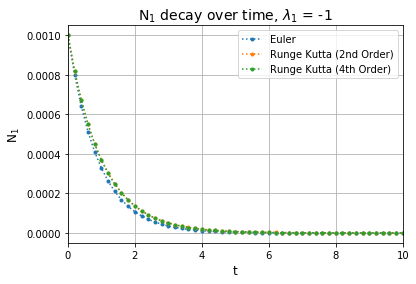

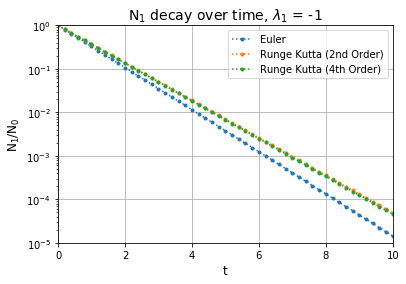

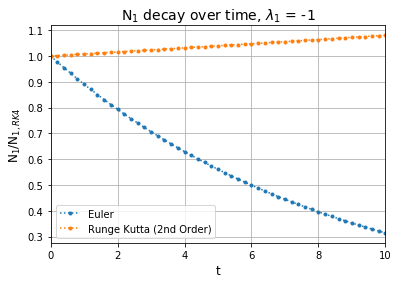

In [9]:
import matplotlib.pyplot as plt

plt.subplot(111)
plt.plot(T,Eul,'.:',label = "Euler")
plt.plot(T,RK2,'.:',label = "Runge Kutta (2nd Order)")
plt.plot(T,RK4,'.:',label = "Runge Kutta (4th Order)")
plt.xlim(0.,10.)
plt.xlabel('t',fontsize='12')
plt.ylabel('N$_1$',fontsize='12')
plt.title('N$_1$ decay over time, $\lambda_1$ = -1',fontsize='14')
plt.grid()
plt.legend()

plt.show()

plt.subplot(111)
plt.semilogy(T,altEul,'.:',label = "Euler")
plt.semilogy(T,altRK2,'.:',label = "Runge Kutta (2nd Order)")
plt.semilogy(T,altRK4,'.:',label = "Runge Kutta (4th Order)")
plt.xlim(0.,10.)
plt.ylim(10.**-5,10.**0)
plt.xlabel('t',fontsize='12')
plt.ylabel('N$_1$/N$_0$',fontsize='12')
plt.title('N$_1$ decay over time, $\lambda_1$ = -1',fontsize='14')
plt.grid()
plt.legend()

plt.show()

plt.subplot(111)
plt.plot(T,(np.array(Eul)/RK4),'.:',label = "Euler")
plt.plot(T,(np.array(RK2)/RK4),'.:',label = "Runge Kutta (2nd Order)")
plt.xlim(0.,10.)
plt.xlabel('t',fontsize='12')
plt.ylabel('N$_1$/N$_{1, RK4}$',fontsize='12')
plt.title('N$_1$ decay over time, $\lambda_1$ = -1',fontsize='14')
plt.grid()
plt.legend()

plt.show()